In [1]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def apply_pca_to_dataset(dataset: str, k: int | None = None, auto_select_k_threshold: float | None = None, use_zero_vals: bool | None = True) -> tuple[matrix, float]:
    """Применить алгоритм PCA к реальному датасету

    Args:
        dataset (str): путь к датасету
        k (None | int): кол-во компонент. Defaults to None.
        auto_select_k_threshold (float | None, optional): порог автоматического выбора k. Defaults to None.
        use_zero_vals (bool | None): включить ли искусственные нулевые переменные в проекцию

    Returns:
        tuple[matrix, float]: кортеж матрицы проекции данных и дисперсии
    """
    df = pd.read_csv(dataset, encoding='unicode-escape').select_dtypes(include=['number'])
    lists = df.to_numpy().tolist()
    X = matrix(len(lists), len(lists[0]), values=lists)
    X = handle_missing_values(X)
    
    return pca(X, k, auto_select_k_threshold, use_zero_vals)

In [3]:
def plot_pca_projection(X_proj: matrix) -> tuple[plt.figure, plt.axes]:
    """Построить график визуализации проекции данных на две главные компоненты

    Args:
        X_proj (matrix): матрица проекции данных

    Returns:
        tuple[plt.figure, plt.axes]: кортеж figure и графика
    """
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    vals = X_proj.T.values

    ax.scatter(vals[0], vals[1], color='red', label='Проекции наблюдений')
    
    ax.set_xlabel("Первая главная компонента")
    ax.set_ylabel("Вторая главная компонента")
    ax.set_title("Проекция данных на первые две главные компоненты")
    ax.legend()

    return fig, ax

In [4]:
df = pd.read_csv("Math-Students.csv", encoding='unicode-escape')
df_num = df.select_dtypes(include=['number'])
df_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,19,1,1,1,1,0,3,2,3,3,3,5,5,8,9,9
395,18,4,4,1,2,0,5,3,2,1,2,4,0,8,7,7
396,17,4,4,1,2,0,5,3,2,1,2,4,0,8,7,7
397,19,4,4,1,2,0,5,3,2,1,2,4,0,8,7,7


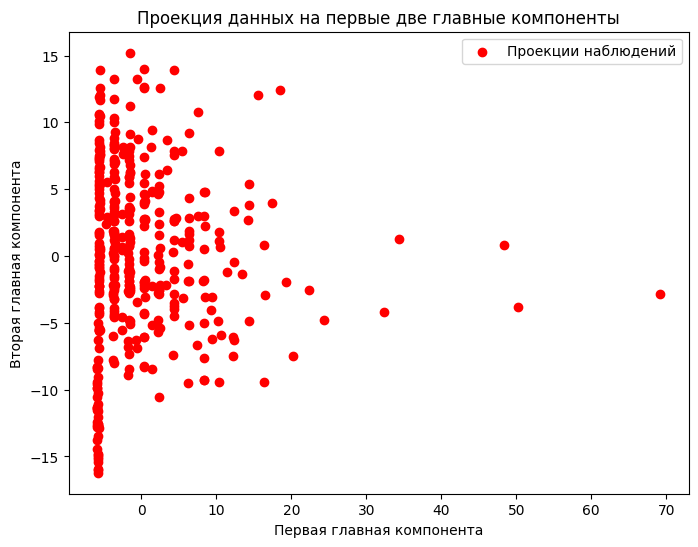

In [5]:
fig, ax = plot_pca_projection(apply_pca_to_dataset(dataset='Math-Students.csv', k=2, use_zero_vals=False)[0])

plt.show()

In [6]:
lists = df_num.to_numpy().tolist()
X = matrix(len(lists), len(lists[0]), lists)

X_c = center_data(X)
cov = covariance_matrix(X_c)
eigenvals = find_eigenvalues(cov)
eigenvecs, spectrum = find_eigenvectors(cov, eigenvals)

k = auto_select_k(spectrum, threshold=0.995)

X_proj, disp = pca(X, k=k, use_zero_vals=True)

Vk = eigenvecs[0]
for i in range(1, k):
    Vk = Vk.concat(eigenvecs[i], axis=1)

Vk_zero = Vk
zero_col = matrix(X.m, 1)
for i in range(k, X.m):
    Vk_zero = Vk_zero.concat(zero_col, axis=1)

X_rec = reconstruct_data(X, X_proj, Vk_zero)
print(X_rec, reconstruction_error(X_or=X, X_rec=X_rec))

18.0047 4.0432 3.9833 2.0502 2.0275 0.0292 4.0063 3.0411 3.9551 0.8028 1.1252 2.9982 6.0 4.9983 6.0083 5.9937 
17.0113 1.1042 0.9597 1.1212 2.0664 0.0704 5.0153 3.0992 2.8917 0.524 1.3022 2.9958 4.0001 4.9959 5.02 5.9848 
14.9993 0.9933 1.0026 0.9922 1.9958 2.9955 3.999 2.9937 2.0069 2.0304 2.9807 3.0003 10.0 7.0003 7.9987 10.001 
15.0027 4.0247 1.9904 1.0288 3.0158 0.0167 3.0036 2.0236 1.9743 0.8869 1.0718 4.999 2.0 14.999 14.0047 14.9964 
15.9952 2.9555 3.0172 0.9482 1.9716 -0.0301 3.9935 2.9576 2.0462 1.2033 1.8709 5.0018 4.0 6.0018 9.9915 10.0065 
15.9891 3.8987 3.0392 0.8822 1.9354 -0.0685 4.9852 3.9036 2.1052 1.4627 1.7063 5.0041 9.9999 15.004 14.9806 15.0148 
16.0094 2.0869 1.9664 1.101 2.0554 0.0587 4.0127 4.0827 3.9097 0.6032 1.2519 2.9965 0.0 11.9965 12.0167 10.9873 
17.0114 4.1055 3.9592 2.1227 2.0672 0.0713 4.0154 1.1003 3.8904 0.5184 1.3057 0.9957 6.0001 5.9958 5.0202 5.9846 
15.0064 3.0589 1.9772 1.0686 2.0376 0.0398 4.0086 2.0561 1.9388 0.7308 1.1709 0.9976 0.0 15.9977 1

In [7]:
add_noise_and_compare(X, noise_level=0.1, k=5)

((5, 0.9246947873014999, 0.5769841268812144),
 (5, 0.9133504992840488, 1.5601728948764388))

# Теорема Гершгорина

### Формулировка:
Пусть $ A $ — квадратная матрица размера $ n $ с элементами $ a_{ij} $, где $ i, j = 1, 2, \dots, n $.

**Тогда все собственные значения матрицы $ A $ принадлежат объединению $ n $ кругов Гершгорина, определённых следующим образом:**


$
R_i = \{ z \in \mathbb{C} : |z - a_{ii}| \leq \sum_{j \neq i} |a_{ij}| \},
$


где:
- $ a_{ii} $ — диагональный элемент матрицы (центр круга),
- $ \sum_{j \neq i} |a_{ij}| $ — радиус круга (сумма модулей внедиагональных элементов строки).

**Примечание**: хоть теорема и определена для комплексной плоскости, ее можно сформулировать и для симметрической вещественной матрицы (следует из доказательства).